# Load Dataset

In [1]:
import pandas as pd

# Memuat dataset CSV
df = pd.read_csv('diabetes.csv')

# Mengambil 5 baris pertama dari dataset
top_5 = df.head(5)

# Mengambil 1 baris terakhir dari dataset
bottom_1 = df.tail(1)

# Membuat dataframe titik-titik sebagai pemisah
dots = pd.DataFrame([['...'] * len(df.columns)], columns=df.columns)

# Menggabungkan data: atas, titik-titik, bawah
combined_df = pd.concat([top_5, dots, bottom_1], ignore_index=True)

# Menampilkan hasil tanpa indeks
print("Data Diabetes (Data Teratas - ... - Data Terbawah):\n")
print(combined_df.to_string(index=False))


Data Diabetes (Data Teratas - ... - Data Terbawah):

Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI DiabetesPedigreeFunction Age Outcome
          6     148            72            35       0  33.6                    0.627  50       1
          1      85            66            29       0  26.6                    0.351  31       0
          8     183            64             0       0  23.3                    0.672  32       1
          1      89            66            23      94  28.1                    0.167  21       0
          0     137            40            35     168  43.1                    2.288  33       1
        ...     ...           ...           ...     ...   ...                      ... ...     ...
          1      93            70            31       0  30.4                    0.315  23       0


# Periksa Dimensi Dataset

In [2]:
df.shape

(768, 9)

# Periksa Tipe Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Cek Missing Values di Setiap Kolom

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Cek Data Duplikat

In [5]:
# Mengecek jumlah duplikat di seluruh dataset
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


# Mengklasifikasikan Dataset Berdasarkan Jenis Data

In [6]:
import pandas as pd

# Membagi kolom berdasarkan tipe data
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns  # Kolom numerik
categorical_features = df.select_dtypes(include=['object', 'category']).columns  # Kolom kategorikal

# Khusus fitur Outcome sebagai kategorikal
categorical_features = list(categorical_features)  # Konversi ke list
if 'Outcome' in df.columns:
    categorical_features.append('Outcome')  # Tambahkan fitur 'Outcome' sebagai kategorikal
    numerical_features = numerical_features.drop('Outcome')  # Hapus 'Outcome' dari fitur numerik

# Data Numerik

In [7]:
print("Kolom Numerik:")
print(numerical_features)
df_numerical = df[numerical_features]
print("\nDataset Numerik:")
print(df_numerical.head().to_string(index=False))

Kolom Numerik:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Dataset Numerik:
 Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  DiabetesPedigreeFunction  Age
           6      148             72             35        0 33.6                     0.627   50
           1       85             66             29        0 26.6                     0.351   31
           8      183             64              0        0 23.3                     0.672   32
           1       89             66             23       94 28.1                     0.167   21
           0      137             40             35      168 43.1                     2.288   33


# Data Kategorikal

In [8]:
print("\nKolom Kategorikal:")
print(categorical_features)
df_categorical = df[categorical_features]
print("\nDataset Kategorikal:")
print(df_numerical.head().to_string(index=False))


Kolom Kategorikal:
['Outcome']

Dataset Kategorikal:
 Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  DiabetesPedigreeFunction  Age
           6      148             72             35        0 33.6                     0.627   50
           1       85             66             29        0 26.6                     0.351   31
           8      183             64              0        0 23.3                     0.672   32
           1       89             66             23       94 28.1                     0.167   21
           0      137             40             35      168 43.1                     2.288   33


# Periksa Skala pada Data Numerikal

In [9]:
df[numerical_features].describe().apply(lambda x: x.map("{:.3f}".format))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000


# Periksa Nilai Unik pada Data Kategorikal (Outcome)

In [10]:
# Periksa nilai unik untuk setiap kolom dalam categorical_features
for col in categorical_features:
    print(f"{col} has {df[col].unique()} values\n")


Outcome has [1 0] values



# Membagi Dataset Menjadi Data Training dan Data Testing

In [11]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data training dan data testing
X = df.drop('Outcome', axis=1)  # Fitur (tanpa kolom 'Outcome')
y = df['Outcome']  # Target (kolom 'Outcome')

# Membagi data menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggabungkan kembali X_train dan y_train menjadi satu dataframe untuk diekspor
train_df = pd.concat([X_train, y_train], axis=1)

# Menggabungkan kembali X_test dan y_test menjadi satu dataframe untuk diekspor
test_df = pd.concat([X_test, y_test], axis=1)

# Mengekspor dataset training dan testing ke file CSV
train_df.to_csv('diabetes_train.csv', index=False)
test_df.to_csv('diabetes_test.csv', index=False)

print("Data training dan testing berhasil diekspor ke diabetes_train.csv dan diabetes_test.csv")


Data training dan testing berhasil diekspor ke diabetes_train.csv dan diabetes_test.csv


# Data Training

In [12]:
import pandas as pd

# Mengambil 4 baris pertama dari dataset
top_4 = train_df.head(4)

# Mengambil 1 baris terakhir dari dataset
bottom_1 = train_df.tail(1)

# Membuat dataframe baru untuk titik-titik
dots = pd.DataFrame([['...', '...', '...', '...', '...', '...', '...', '...', '...']], columns=train_df.columns)

# Menggabungkan data teratas, titik-titik, dan data terbawah
combined_data = pd.concat([top_4, dots, bottom_1], ignore_index=True)

# Menghilangkan penomoran indeks dan mencetak hasilnya dengan newline
print("Data Training (Data Teratas - ... - Data Terbawah):\n")
print(combined_data.to_string(index=False))


Data Training (Data Teratas - ... - Data Terbawah):

Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI DiabetesPedigreeFunction Age Outcome
          2      84             0             0       0   0.0                    0.304  21       0
          9     112            82            24       0  28.2                    1.282  50       1
          1     139            46            19      83  28.7                    0.654  22       0
          0     161            50             0       0  21.9                    0.254  65       0
        ...     ...           ...           ...     ...   ...                      ... ...     ...
          0     125            96             0       0  22.5                    0.262  21       0


# Data Testing

In [13]:
import pandas as pd

# Mengambil 4 baris pertama dari dataset
top_4 = test_df.head(4)

# Mengambil 1 baris terakhir dari dataset
bottom_1 = test_df.tail(1)

# Membuat dataframe baru untuk titik-titik
dots = pd.DataFrame([['...', '...', '...', '...', '...', '...', '...', '...', '...']], columns=test_df.columns)

# Menggabungkan data teratas, titik-titik, dan data terbawah
combined_data = pd.concat([top_4, dots, bottom_1], ignore_index=True)

# Menghilangkan penomoran indeks dan mencetak hasilnya dengan newline
print("Data Testing (Data Teratas - ... - Data Terbawah):\n")
print(combined_data.to_string(index=False))


Data Testing (Data Teratas - ... - Data Terbawah):

Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI DiabetesPedigreeFunction Age Outcome
          6      98            58            33     190  34.0                     0.43  43       0
          2     112            75            32       0  35.7                    0.148  21       0
          2     108            64             0       0  30.8                    0.158  21       0
          8     107            80             0       0  24.6                    0.856  34       0
        ...     ...           ...           ...     ...   ...                      ... ...     ...
          8      74            70            40      49  35.3                    0.705  39       0


# Feature Selection - Random Forest

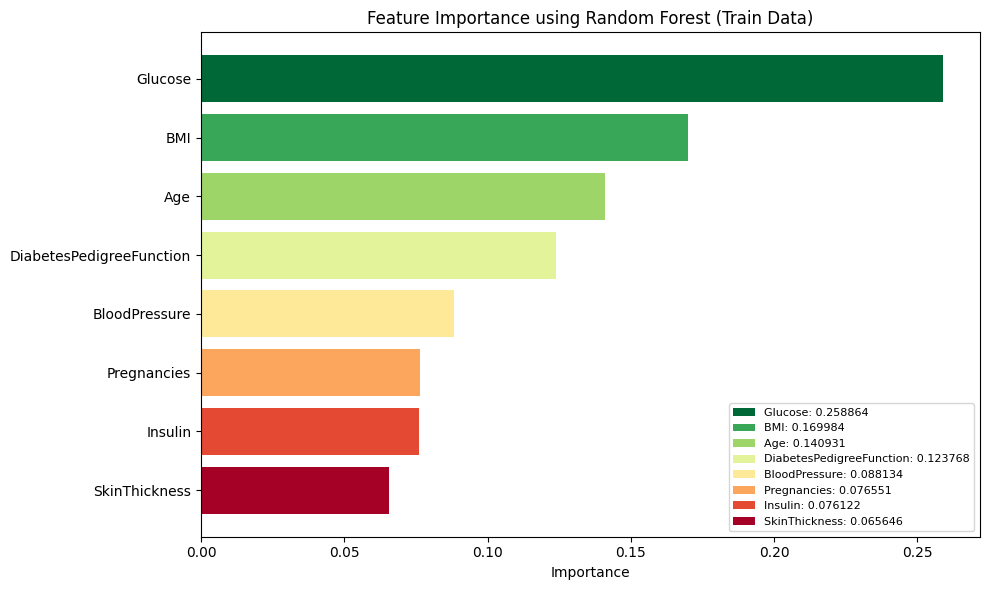


Feature Importance (Train Data):
                     Feature  Importance
1                   Glucose    0.258864
5                       BMI    0.169984
7                       Age    0.140931
6  DiabetesPedigreeFunction    0.123768
2             BloodPressure    0.088134
0               Pregnancies    0.076551
4                   Insulin    0.076122
3             SkinThickness    0.065646


In [14]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Menyiapkan data fitur dan target dari data train
X_train = train_df[numerical_features]  # Fitur numerik
y_train = train_df['Outcome']  # Target

# Melatih model Random Forest dengan data train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Mengambil pentingnya fitur
feature_importances_rf = rf_model.feature_importances_

# Menampilkan pentingnya fitur
feature_df_rf = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances_rf
})

# Mengurutkan berdasarkan pentingnya fitur
feature_df_rf = feature_df_rf.sort_values(by='Importance', ascending=True)  # ascending=True untuk barh

# Menentukan warna untuk setiap fitur (dari hijau ke merah)
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(feature_df_rf)))  # Palet warna hijau ke merah

# Visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_df_rf['Feature'], feature_df_rf['Importance'], color=colors)

# Membuat legend dengan warna yang sesuai dengan urutan kepentingan fitur
labels_sorted = [f'{feature}: {importance:.6f}' for feature, importance in zip(feature_df_rf['Feature'], feature_df_rf['Importance'])]

# Menyesuaikan warna legend agar sesuai dengan warna di chart
legend_colors = plt.cm.RdYlGn(np.linspace(0, 1, len(feature_df_rf)))

# Membalikkan urutan warna dan urutan list di legend
plt.legend(bars[::-1], labels_sorted[::-1], loc='lower right', fontsize=8)

plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest (Train Data)')
plt.tight_layout()
plt.show()

# Menampilkan fitur yang paling penting
print("\nFeature Importance (Train Data):\n", feature_df_rf.sort_values(by='Importance', ascending=False))


# Pilih dan Eksekusi Feature Selection

In [15]:
# Daftar fitur yang akan dihapus
features_to_remove = ['SkinThickness', 'Insulin', 'Pregnancies', 'BloodPressure']

# Menghapus fitur yang tidak diinginkan dari dataset training dan testing
train_selected_df = train_df.drop(columns=features_to_remove)
test_selected_df = test_df.drop(columns=features_to_remove)

# Pisahkan fitur (X) dan target (y) untuk dataset yang sudah dipilih fiturnya
X_train_selected = train_selected_df.drop(columns=['Outcome'])
y_train_selected = train_selected_df['Outcome']
X_test_selected = test_selected_df.drop(columns=['Outcome'])
y_test_selected = test_selected_df['Outcome']

# Menyimpan dataset yang sudah dilakukan feature selection (jika perlu)
train_selected_df.to_csv('diabetes_train_selected.csv', index=False)
test_selected_df.to_csv('diabetes_test_selected.csv', index=False)

print("Feature selection selesai. Dataset terpilih disimpan di 'diabetes_train_selected.csv' dan 'diabetes_test_selected.csv'.")


Feature selection selesai. Dataset terpilih disimpan di 'diabetes_train_selected.csv' dan 'diabetes_test_selected.csv'.


# Data Training

In [16]:
import pandas as pd

# Mengambil 4 baris pertama dari dataset
top_4 = train_selected_df.head(4)

# Mengambil 1 baris terakhir dari dataset
bottom_1 = train_selected_df.tail(1)

# Membuat dataframe baru untuk titik-titik
dots = pd.DataFrame([['...', '...', '...', '...', '...']], columns=train_selected_df.columns)

# Menggabungkan data teratas, titik-titik, dan data terbawah
combined_data = pd.concat([top_4, dots, bottom_1], ignore_index=True)

# Menghilangkan penomoran indeks dan mencetak hasilnya dengan newline
print("Data Testing Setelah Penghapusan Fitur:\n")
print(combined_data.to_string(index=False))


Data Testing Setelah Penghapusan Fitur:

Glucose   BMI DiabetesPedigreeFunction Age Outcome
     84   0.0                    0.304  21       0
    112  28.2                    1.282  50       1
    139  28.7                    0.654  22       0
    161  21.9                    0.254  65       0
    ...   ...                      ... ...     ...
    125  22.5                    0.262  21       0


# Data Testing

In [17]:
import pandas as pd

# Mengambil 4 baris pertama dari dataset
top_4 = test_selected_df.head(4)

# Mengambil 1 baris terakhir dari dataset
bottom_1 = test_selected_df.tail(1)

# Membuat dataframe baru untuk titik-titik
dots = pd.DataFrame([['...', '...', '...', '...', '...']], columns=test_selected_df.columns)

# Menggabungkan data teratas, titik-titik, dan data terbawah
combined_data = pd.concat([top_4, dots, bottom_1], ignore_index=True)

# Menghilangkan penomoran indeks dan mencetak hasilnya dengan newline
print("Data Testing Setelah Penghapusan Fitur:\n")
print(combined_data.to_string(index=False))


Data Testing Setelah Penghapusan Fitur:

Glucose   BMI DiabetesPedigreeFunction Age Outcome
     98  34.0                     0.43  43       0
    112  35.7                    0.148  21       0
    108  30.8                    0.158  21       0
    107  24.6                    0.856  34       0
    ...   ...                      ... ...     ...
     74  35.3                    0.705  39       0
